<a href="https://colab.research.google.com/github/huynhspm/Basic_ML/blob/main/Neural%20Network/Softmax_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bài toán phân loại nhiều classes (biên là tuyến tính)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 

np.random.seed(4)

In [3]:
def visualize_data(X, y):
    X0 = X[y == 0, :]
    X1 = X[y == 1, :]
    X2 = X[y == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 7)
    plt.plot(X1[:, 0], X1[:, 1], 'g^', markersize = 7)
    plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 7)

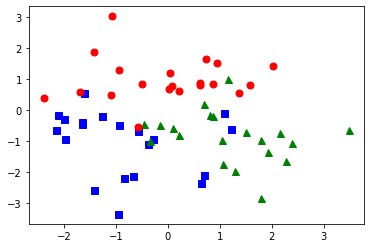

In [4]:
N = 20
means = [[-1, -1], [1, -1], [0, 1]]
cov = [[1, 0], [0, 1]]
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis = 0)
y = np.array([0]*N + [1]*N + [2]*N)

visualize_data(X, y)

In [5]:
model = LogisticRegression(C=1e5, solver = 'lbfgs', multi_class = 'multinomial')
model.fit(X, y)

LogisticRegression(C=100000.0, multi_class='multinomial')

In [6]:
def visualize_boundary(model):
    x1 = np.arange(-4, 4, 0.025)
    x2 = np.arange(-4, 4, 0.025)
    x1, x2 = np.meshgrid(x1, x2)
    
    xx1 = x1.ravel().reshape(x1.size, 1)
    xx2 = x2.ravel().reshape(x2.size, 1)
    
    X = np.concatenate((xx1, xx2), axis = 1)
    y = model.predict(X)
    y = y.reshape(x1.shape)
    plt.contourf(x1, x2, y, 200, cmap='jet', alpha = .1)

def display_result(model, X, y):
    visualize_data(X, y)
    visualize_boundary(model)

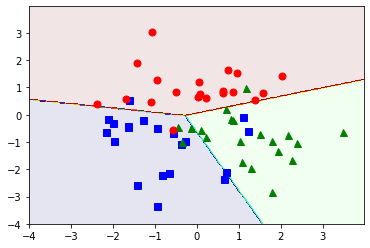

In [7]:
display_result(model, X, y)